In [77]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Distances

In [78]:
distances = {
    'e': 1.0,
    'm': 1.0,
    't': 1.0,
    'i': 1.0,
    'r': 1.0,
    'meters': 0.001,
    'kilometers': 1.0,
    '1 mile': 1.60934,
    '1.5k': 1.5,
    '3k': 3.0,
    '2 mile': 3.21869,
    '5k': 5.0,
    '10k': 10.0,
    '15k': 15.0,
    '1/2 marathon': 21.0975,
    'marathon': 42.195,
}

### book pace / times (to be used as model target variable (y) vector)

In [79]:
df = pd.DataFrame(index=range(30, 86))
df.index.name = 'vdot'

# Training Pace

# E
t = [8,14,8,2,7,52,7,41,7,31,7,21,7,11,7,2,6,54,6,46,6,38,6,31,6,23,6,16,6,10,
     6,3,5,57,5,51,5,45,5,40,5,34,5,29,5,24,5,19,5,14,5,10,5,5,5,1,4,57,4,53,
     4,49,4,45,4,41,4,38,4,34,4,31,4,28,4,24,4,21,4,18,4,15,4,12,4,10,4,7,4,4,
     4,1,3,58,3,56,3,53,3,51,3,49,3,46,3,44,3,42,3,40,3,38]
df['e'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# M
t = [7,3,6,52,6,40,6,30,6,20,6,10,6,1,5,53,5,45,5,37,5,29,5,22,5,16,5,9,5,3,
     4,57,4,51,4,46,4,41,4,36,4,31,4,27,4,22,4,18,4,14,4,10,4,6,4,3,3,59,3,56,
     3,52,3,49,3,46,3,43,3,40,3,37,3,34,3,31,3,29,3,26,3,24,3,21,3,19,3,16,3,14,
     3,12,3,10,3,8,3,6,3,3,3,1,3,0,2,58,2,56,2,54,2,52]
df['m'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# T
t = [6,24,6,14,6,5,5,56,5,48,5,40,5,33,5,26,5,19,5,12,5,6,5,0,4,54,4,49,4,43,
     4,38,4,33,4,29,4,24,4,20,4,15,4,11,4,7,4,4,4,0,3,56,3,53,3,50,3,46,3,43,
     3,40,3,37,3,34,3,32,3,29,3,26,3,24,3,21,3,19,3,16,3,14,3,12,3,10,3,8,3,6,
     3,4,3,2,3,0,2,58,2,56,2,54,2,53,2,51,2,49,2,48,2,46]
df['t'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# I
t = [5,54,5,45,5,36,5,28,5,21,5,13,5,6,5,0,4,54,4,48,4,42,4,36,4,31,4,26,4,21,
     4,16,4,12,4,7,4,3,3,59,3,55,3,51,3,48,3,44,3,41,3,37,3,34,3,31,3,28,3,25,
     3,23,3,20,3,17,3,15,3,12,3,10,3,8,3,5,3,3,3,1,2,59,2,57,2,55,2,53,2,51,2,
     49,2,48,2,46,2,44,2,42,2,41,2,39,2,38,2,36,2,35,2,33]
df['i'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# R
t = [5,36,5,26,5,16,5,7,4,59,4,51,4,44,4,37,4,31,4,25,4,19,4,14,4,9,4,4,4,0,
     3,56,3,52,3,48,3,44,3,40,3,37,3,34,3,30,3,27,3,24,3,21,3,18,3,15,3,13,
     3,10,3,7,3,4,3,2,2,59,2,57,2,54,2,52,2,49,2,47,2,44,2,42,2,40,2,38,2,36,
     2,34,2,32,2,30,2,28,2,27,2,25,2,24,2,23,2,22,2,21,2,20,2,20]
df['r'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]


# Race times

# 1,500
t = [8,30,8,15,8,2,7,49,7,37,7,25,7,14,7,4,6,54,6,44,6,35,6,27,6,19,6,11,6,3,
     5,56,5,49,5,42,5,36,5,30,5,24,5,18,5,13,5,7,5,2,4,57,4,53,4,48,4,44,4,39,
     4,35,4,31,4,27,4,24,4,20,4,16,4,13,4,10,4,6,4,3,4,0,3,57,3,54,3,52,3,49,
     3,46,3,44,3,41,3,39,3,37,3,34,3,32,3,30,3,28,3,26,3,24]
df['1.5k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['1.5k'] = df['1.5k'] / distances['1.5k']

# Mile
t = [9,11,8,55,8,41,8,27,8,14,8,1,7,49,7,38,7,27,7,17,7,7,6,58,6,49,6,41,6,32,
     6,25,6,17,6,10,6,3,5,56,5,50,5,44,5,38,5,32,5,27,5,21,5,16,5,11,5,6,5,2,
     4,57,4,53,4,49,4,45,4,41,4,37,4,33,4,30,4,26,4,23,4,19,4,16,4,13,4,10,4,7,
     4,4,4,2,3,58,3,56.2,3,53.7,3,51.2,3,48.7,3,46.4,3,44.,3,41.8,3,39.6]
df['1 mile'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['1 mile'] = df['1 mile'] / distances['1 mile']

# 3k
t = [17,56,17,27,16,59,16,33,16,9,15,45,15,23,15,1,14,41,14,21,14,3,13,45,13,28,
     13,11,12,55,12,40,12,26,12,12,11,58,11,45,11,33,11,21,11,9,10,58,10,47,
     10,37,10,27,10,17,10,8,9,58,9,50,9,41,9,33,9,25,9,17,9,9,9,2,8,55,8,48,
     8,41,8,34,8,28,8,22,8,16,8,10,8,4,7,58,7,53,7,48,7,43,7,37.5,7,32.5,
     7,27.7,7,23.0,7,18.5,7,14.0]
df['3k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['3k'] = df['3k'] / distances['3k']

# 2 mile
t = [19,19,18,48,18,18,17,50,17,24,16,58,16,34,16,11,15,49,15,29,15,8,14,49,
     14,31,14,13,13,56,13,40,13,25,13,10,12,55,12,41,12,28,12,15,12,2,11,50,
     11,39,11,28,11,17,11,6,10,56,10,46,10,37,10,27,10,18,10,11,10,1,9,53,9,45,
     9,37,9,30,9,23,9,16,9,9,9,2,8,55,8,49,8,43,8,37,8,31,8,25,8,20,8,14.2,
     8,8.9,8,3.7,7,58.6,7,53.6,7,48.8]
df['2 mile'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['2 mile'] = df['2 mile'] / distances['2 mile']

# 5k
t = [30,40,29,51,29,5,28,21,27,39,27,0,26,22,25,46,25,12,24,39,24,8,23,38,23,
     9,22,41,22,15,21,50,21,25,21,2,20,39,20,18,19,57,19,36,19,17,18,58,18,40,
     18,22,18,5,17,49,17,33,17,17,17,3,16,48,16,34,16,20,16,7,15,54,15,42,15,29,
     15,18,15,6,14,55,14,44,14,33,14,23,14,13,14,3,13,54,13,44,13,35,13,26,
     13,17.8,13,9.3,13,1.1,12,53.0,12,45.2,12,37.4]
df['5k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['5k'] = df['5k'] / distances['5k']

# 10k
t = [63,46,62,3,60,26,58,54,57,26,56,3,54,44,53,29,52,17,51,9,50,3,49,1,48,1,
     47,4,46,9,45,16,44,25,43,36,42,50,42,4,41,21,40,39,39,59,39,20,38,42,38,6,
     37,31,36,57,36,24,35,52,35,22,34,52,34,23,33,55,33,28,33,1,32,35,32,11,
     31,46,31,23,31,0,30,38,30,16,29,55,29,34,29,14,28,55,28,36,28,17,27,59,27,
     41,27,24,27,7,26,51,26,34,26,19]
df['10k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['10k'] = df['10k'] / distances['10k']

# 15k
t = [98,14,95,36,93,7,90,45,88,30,86,22,84,20,82,24,80,33,78,47,77,6,75,29,73,
     56,72,27,71,2,69,40,68,22,67,6,65,53,64,44,63,36,62,31,61,29,60,28,59,30,
     58,33,57,39,56,46,55,55,55,6,54,18,53,32,52,47,52,3,51,21,50,40,50,0,49,22,
     48,44,48,8,47,32,46,58,46,24,45,51,45,19,44,48,44,18,43,49,43,20,42,52,
     42,25,41,58,41,32,41,6,40,42,40,17]
df['15k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]
df['15k'] = df['15k'] / distances['15k']

# 1/2 marathon
t = [2,21,4,2,17,21,2,13,49,2,10,27,2,7,16,2,4,13,2,1,19,1,58,34,1,55,55,
     1,53,24,1,50,59,1,48,40,1,46,27,1,44,20,1,42,17,1,40,20,1,38,27,1,36,38,
     1,34,53,1,33,12,1,31,35,1,30,2,1,28,31,1,27,4,1,25,40,1,24,18,1,23,0,
     1,21,43,1,20,30,1,19,18,1,18,9,1,17,2,1,15,57,1,14,54,1,13,53,1,12,53,
     1,11,56,1,11,0,1,10,5,1,9,12,1,8,21,1,7,31,1,6,42,1,5,54,1,5,8,1,4,23,
     1,3,39,1,2,56,1,2,15,1,1,34,1,0,54,1,0,15,0,59,38,0,59,1,0,58,25,0,57,50]
df['1/2 marathon'] = [datetime.timedelta(hours=h, minutes=m, seconds=s) for h, m, s in zip(t[0::3], t[1::3], t[2::3])]
df['1/2 marathon'] = df['1/2 marathon'] / distances['1/2 marathon']

# marathon
t = [4,49,17,4,41,57,4,34,59,4,28,22,4,22,3,4,16,3,4,10,19,4,4,50,3,59,35,
     3,54,34,3,49,45,3,45,9,3,40,43,3,36,28,3,32,23,3,28,26,3,24,39,3,21,0,
     3,17,29,3,14,6,3,10,49,3,7,39,3,4,36,3,1,39,2,58,47,2,56,1,2,53,20,2,50,45,
     2,48,14,2,45,47,2,43,25,2,41,8,2,38,54,2,36,44,2,34,38,2,32,35,2,30,36,
     2,28,40,2,26,47,2,24,57,2,23,10,2,21,26,2,19,44,2,18,5,2,16,29,2,14,55,
     2,13,23,2,11,54,2,10,27,2,9,2,2,7,38,2,6,17,2,4,57,2,3,40,2,2,24,2,1,10]
df['marathon'] = [datetime.timedelta(hours=h, minutes=m, seconds=s) for h, m, s in zip(t[0::3], t[1::3], t[2::3])]
df['marathon'] = df['marathon'] / distances['marathon']

### model feature input matrix (X)

In [80]:
X = pd.DataFrame(data=df.index)
X['vdot_log'] = np.log(X.vdot)
X['vdot_reciprocal'] = 1/X.vdot
X['vdot_pow2'] = X.vdot ** 2
X['vdot_pow3'] = X.vdot ** 3

### visually inspect & check target variable for input errors

Text(0.5, 1.0, 'x5 vdot_pow3')

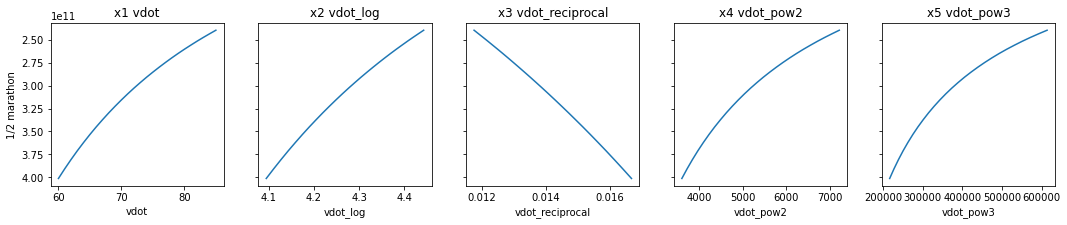

In [81]:
target = '1/2 marathon'

fig, ax = plt.subplots(1, 5, figsize=(18, 3), sharey=True)
sns.lineplot(x=X.vdot, y=df[target], ax=ax[0]).set_title('x1 vdot')
sns.lineplot(x=X.vdot_log, y=df[target], ax=ax[1]).set_title('x2 vdot_log')
sns.lineplot(x=X.vdot_reciprocal, y=df[target], ax=ax[2]).set_title('x3 vdot_reciprocal')
sns.lineplot(x=X.vdot_pow2, y=df[target], ax=ax[3]).set_title('x4 vdot_pow2')
sns.lineplot(x=X.vdot_pow3, y=df[target], ax=ax[4]).set_title('x5 vdot_pow3')

### Build model and extract bias / coefficients

In [82]:
from sklearn.linear_model import LinearRegression

y = df['1.5k'].apply(lambda x: int(x.total_seconds()))

clf = LinearRegression()
clf.fit(X, y)

print('accuracy:', clf.score(X, y))
print('residuals:', np.round((clf.predict(X)), 0) - y.values)
print(f"\nnp.array([{clf.intercept_}, {clf.coef_[0]}, {clf.coef_[1]}, {clf.coef_[2]}, {clf.coef_[3]}, {clf.coef_[4]}])")

accuracy: 0.999975056182517
residuals: [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.]

np.array([-1024.5822352717075, -10.731044795236159, 353.2650183281407, 13005.840167602588, 0.06171966948983876, -0.0001562261014669275])


### weights (model bias + coefficients)

In [83]:
pace_coefs = {
    'e':
        np.array([4949.27103996282, 35.90981260691225, -1471.4577840422419,
        -10780.124357908137, -0.20469289084241282, 0.0005847523343618377]),
    'm':
        np.array([5769.83766356983, 49.293532532288424, -1810.3895026597256,
        -12851.045985015659, -0.291126234807642, 0.0008304956752454018]),
    't':
        np.array([223.6265478238622, -5.763413154957469, 19.099113274553744,
        6742.587058504519, 0.05418680896355041, -0.0002009103554740932]),
    'i':
        np.array([-1397.1455774707638, -20.7582565066043, 538.6711541187304,
        12633.618023527979, 0.14848775051980745, -0.0004883293344164485]),
    'r':
        np.array([10660.490550384873, 130.77354304136978, -3692.965990299492,
        -27355.696889999857, -0.9608418286816445, 0.003311943788503413]),
    '1.5k':  
        np.array([-1024.5822352717075, -10.731044795236159, 353.2650183281407,
        13005.840167602588, 0.06171966948983876, -0.0001562261014669275]),
    '1 mile':
        np.array([576.7753448412576, 3.3192456503761933, -156.34952340276442,
        6420.044874165655, -0.020670725644730936, 7.408644617612481e-05]),
    '3k':
        np.array([1499.2430457131895, 6.767824096643538, -404.92262747303425,
        1607.0419570247086, -0.02374668119369172, 3.4554979492895654e-05]),
    '2 mile':
        np.array([-1045.0013023631577, -14.640786068658485, 396.2141979621974,
        12469.405383898818, 0.09920956538251247, -0.0003080573083593663]),
    '5k':
        np.array([437.6518586459911, 0.4941894100173703, -91.52385224172308,
        6835.359275121465, -0.0015546250007074658, 1.4531197450651234e-05]),
    '10k':
        np.array([1485.7044109851745, 9.090936250940503, -420.81173038190957,
        2829.640433497747, -0.047615054284755765, 0.00012889765116597118]),
    '15k':
        np.array([5324.864916618287, 42.969983444853156, -1642.127218950582,
        -12899.002436731642, -0.25137909439659367, 0.0007276965582150297]),
    '1/2 marathon':
        np.array([1276.183264850465, 4.319297166627139, -326.60317176899537,
        3415.9304672035796, -0.008655923707888036, -9.751162735938124e-06]),
    'marathon':
        np.array([1075.634255870165, 2.9638403435363587, -260.1835184112333,
        4138.276684781273, -0.007771151460666648, 1.250212534387174e-05])
}

### pace, distance & time functions

In [84]:
def get_pace_from_vdot_and_intensity(vdot, intensity):
    X = np.array([1, vdot, np.log(vdot), 1/vdot, vdot**2, vdot**3])
    w = pace_coefs[intensity]
    seconds = np.round(X @ w,)
    return datetime.timedelta(seconds=seconds)

def get_time_from_vdot_and_race(vdot, race):
    pace = get_pace_from_vdot_and_intensity(vdot, race)
    distance = distances[race]
    return pace * distance

def calculate_pace(time: datetime.timedelta, distance: float) -> datetime.timedelta:
    return time / distance

def calculate_time(distance: float, pace: datetime.timedelta) -> datetime.timedelta:
    return distance * pace

def calculate_distance(time: datetime.timedelta, pace: datetime.timedelta) -> float:
    return np.round(time / pace, 5)

def convert_pace_km_to_miles(pace: datetime.timedelta) -> datetime.timedelta:
    return pace * 1.609344

def convert_pace_miles_to_km(pace: datetime.timedelta) -> datetime.timedelta:
    return pace / 1.609344

def convert_distance_km_to_miles(pace: datetime.timedelta) -> datetime.timedelta:
    return pace / 1.609344

def convert_distance_miles_to_km(pace: datetime.timedelta) -> datetime.timedelta:
    return pace * 1.609344

def format_time(td: datetime.timedelta, strip: bool=True):
    td = datetime.timedelta(seconds=td.seconds).__str__()
    return re.search(pattern=r'[1-9].*', string=td).group() if strip else td

In [85]:
print(convert_distance_km_to_miles(42.195))
print(convert_distance_miles_to_km(26.2188))

26.218757456454306
42.1950684672


In [86]:
time = datetime.timedelta(hours=2, minutes=45, seconds=0)
distance = distances['marathon']
pace = datetime.timedelta(hours=0, minutes=3, seconds=55)

print(calculate_time(distance, pace))
print(calculate_distance(time, pace))
print(calculate_pace(time, distance))

2:45:15.825000
42.12766
0:03:54.624956


### Test output

In [87]:
vdot = 30
race = ['1.5k', '10k', 'marathon', '3k'][2]
distance = distances[race]
time = get_time_from_vdot_and_race(vdot, race)
print(f'vdot: {vdot} \nrace: {race} \ndistance: {distance} \ntime: {format_time(time)}')

pace = calculate_pace(time, distance)
pace_mi = convert_pace_km_to_miles(pace)
time = calculate_time(distance, pace)
distance = calculate_distance(time, pace)
print(f'\npace (km): {format_time(pace)} \npace (mi): {format_time(pace_mi)} \ntime: {format_time(time)} \ndistance: {distance}')

vdot: 30 
race: marathon 
distance: 42.195 
time: 6:51

pace (km): 9 
pace (mi): 15 
time: 6:51 
distance: 42.195


### Evaluate model accuracy (actual Vs model prediction)

,count,mean,std,min,25%,50%,75%,max
e_delta,56.0,-0.035714,0.328317,-1.0,0.0,0.0,0.0,1.0
m_delta,56.0,0.035714,0.187256,0.0,0.0,0.0,0.0,1.0
t_delta,56.0,0.000000,0.190693,-1.0,0.0,0.0,0.0,1.0
i_delta,56.0,0.000000,0.190693,-1.0,0.0,0.0,0.0,1.0
r_delta,56.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1.5k_delta,56.0,0.017857,0.300972,-1.0,0.0,0.0,0.0,1.0
1 mile_delta,56.0,-0.017857,0.300972,-1.0,0.0,0.0,0.0,1.0
3k_delta,56.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2 mile_delta,56.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5k_delta,56.0,0.000000,0.190693,-1.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='vdot'>

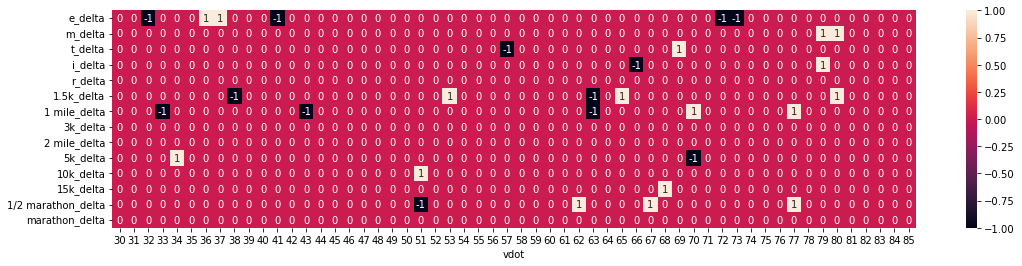

In [88]:
eval = pd.DataFrame(index=df.index)
for race in df.columns:
    eval[race + '_y'] = df[race].apply(lambda x: int(x.total_seconds()))
    eval[race + '_y_pred'] = [int(get_time_from_vdot_and_race(vdot=i, race=race).total_seconds()) for i in range(30, 86)]
    eval[race + '_delta'] = eval[race + '_y_pred'] - eval[race + '_y']
display(eval.filter(regex=r'delta').describe().T)
plt.figure(figsize=(18, 4))
sns.heatmap(eval.filter(regex=r'delta').T, annot=True)

### error in book identified (varience between m-pace and marathon time)

In [89]:
results_m_pace_km = []
results_m_pace_mi = []
results_m_time = []
for vdot in range(30, 86):
    race = 'm'
    time = get_time_from_vdot_and_race(vdot, race)
    distance = distances[race]
    pace = calculate_pace(time, distance)
    time = calculate_time(42.195, pace)
    results_m_pace_km.append(pace)
    results_m_pace_mi.append(convert_pace_km_to_miles(pace))
    results_m_time.append(time)

results_marathon_pace_km = []
results_marathon_pace_mi = []
results_marathon_time = []
for vdot in range(30, 86):
    race = 'marathon'
    time = get_time_from_vdot_and_race(vdot, race)
    distance = distances[race]
    pace = calculate_pace(time, distance)
    time = calculate_time(42.195, pace)
    results_marathon_pace_km.append(pace)
    results_marathon_pace_mi.append(convert_pace_km_to_miles(pace))
    results_marathon_time.append(time)

In [90]:
df1 = pd.DataFrame(range(30,86), columns=['vdot'])
df1.set_index('vdot', inplace=True)
df1['m pace (km)'] = results_m_pace_km
df1['marathon pace (km)'] = results_marathon_pace_km
df1['error (km)'] = df1['m pace (km)'].apply(lambda x: int(np.round(x.total_seconds(), 0))) - \
               df1['marathon pace (km)'].apply(lambda x: int(np.round(x.total_seconds(), 0)))
df1['m pace (mi)'] = results_m_pace_mi
df1['marathon pace (mi)'] = results_marathon_pace_mi
df1['error (mi)'] = df1['m pace (mi)'].apply(lambda x: int(np.round(x.total_seconds(), 0))) - \
               df1['marathon pace (mi)'].apply(lambda x: int(np.round(x.total_seconds(), 0)))
df1['m time'] = results_m_time
df1['marathon time'] = results_marathon_time
df1['error'] = df1['m time'].apply(lambda x: int(np.round(x.total_seconds(), 0))) - \
               df1['marathon time'].apply(lambda x: int(np.round(x.total_seconds(), 0)))

df1['m pace (km)'] = df1['m pace (km)'].apply(lambda x: format_time(x))
df1['marathon pace (km)'] = df1['marathon pace (km)'].apply(lambda x: format_time(x))
df1['m pace (mi)'] = df1['m pace (mi)'].apply(lambda x: format_time(x))
df1['marathon pace (mi)'] = df1['marathon pace (mi)'].apply(lambda x: format_time(x))
df1['m time'] = df1['m time'].apply(lambda x: format_time(x))
df1['marathon time'] = df1['marathon time'].apply(lambda x: format_time(x))
df1

,m pace (km),marathon pace (km),error (km),m pace (mi),marathon pace (mi),error (mi),m time,marathon time,error
vdot,,,,,,,,,
30,7:03,9,413,11:20,15,665,4:57:28,6:51,17437
31,6:52,9,403,11:03,15,648,4:49:44,6:39,16984
32,6:40,9,391,10:43,14,629,4:41:18,6:31,16487
33,6:30,9,381,10:27,14,613,4:34:16,6:21,16075
34,6:20,8,371,10:11,14,598,4:27:14,6:11,15662
35,6:10,8,361,9:55,13,581,4:20:12,6:04,15248
36,6:01,8,353,9:40,13,567,4:13:52,5:54,14877
37,5:53,8,345,9:28,13,555,4:08:14,5:48,14547
38,5:45,8,337,9:15,12,542,4:02:37,5:40,14217
